In [1]:
# Import Dependencies
%matplotlib inline
import scipy.io as spio
import scipy.io as sio
import gzip
import scipy.io
import h5py
from pandas import Series, DataFrame
import csv
import json


# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import qgrid
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing of the test and train data
train=pd.read_csv('train_values.csv')
test=pd.read_csv('train_values.csv')
data1=pd.read_csv('train_labels.csv')

In [3]:
#to view the train data
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [5]:
#merging(to understand this please open the .csv file in excel)
data=pd.concat([train,data1],axis=1)     

In [6]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


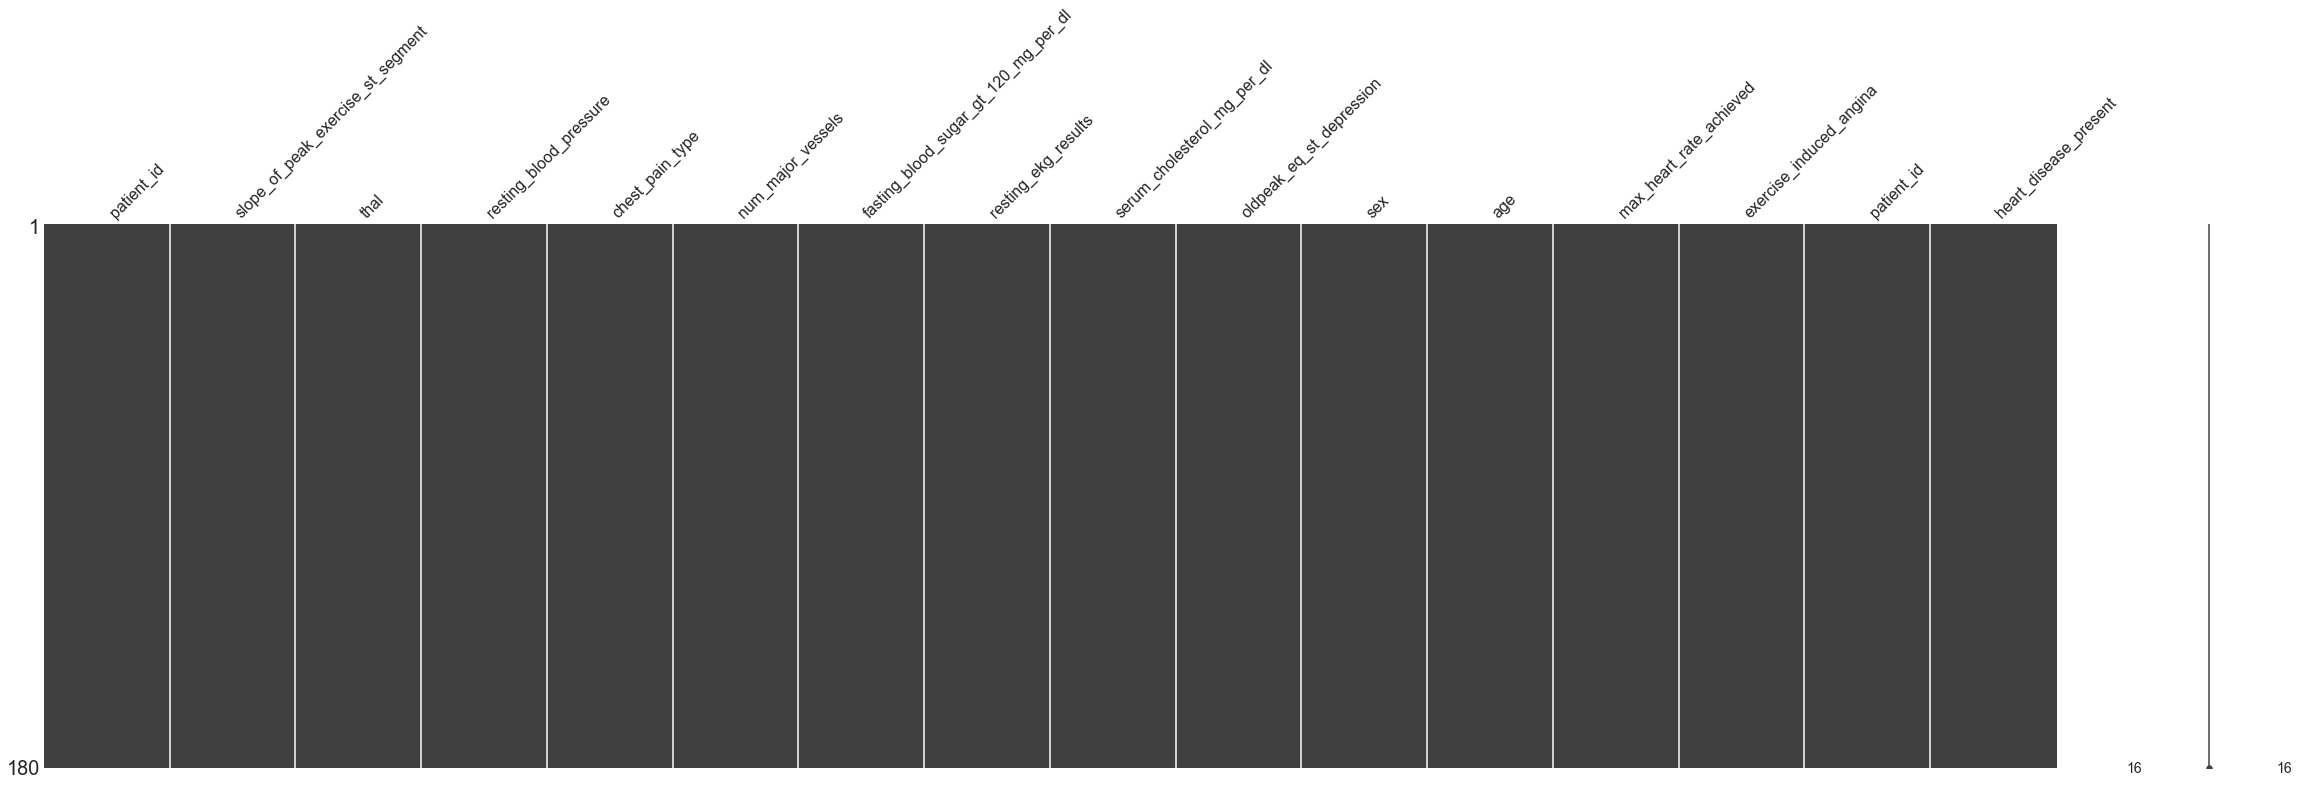

In [7]:
#for missing values
missingno.matrix(data,figsize =(40,10))

# above we found out that there are no missing values

In [8]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
patient_id                              0
heart_disease_present                   0
dtype: int64

In [9]:
#patient categories count
data['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

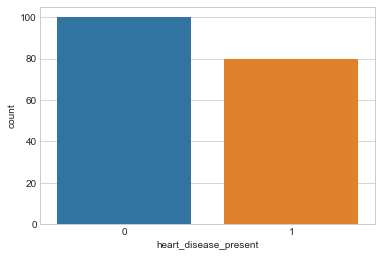

In [11]:
sns.countplot(x='heart_disease_present',data=data)

In [13]:
df_bin=pd.DataFrame() #for discretised continous variables(categorising)
df_con=pd.DataFrame() #for continous variable

In [14]:
data.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
patient_id                               object
heart_disease_present                     int64
dtype: object

In [15]:
#now we will Feature thal
data.thal.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

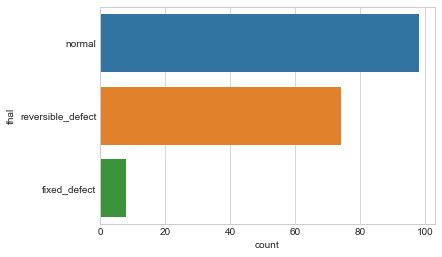

In [16]:
#what does the count looks like?
sns.countplot(y='thal',data=data)

# Feature thal

In [18]:
#add thal to sub dataframes
df_bin['thal']=data['thal']
df_con['thal']=data['thal']

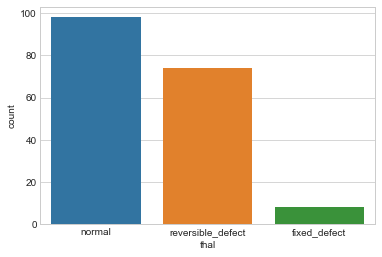

In [58]:
#plotting for better understanding
sns.countplot(train.thal)

In [19]:
df_bin.head()

,thal
0,normal
1,normal
2,normal
3,reversible_defect
4,reversible_defect


# Feature exercise_induced_angina

In [20]:
data.exercise_induced_angina.value_counts()

0    123
1     57
Name: exercise_induced_angina, dtype: int64

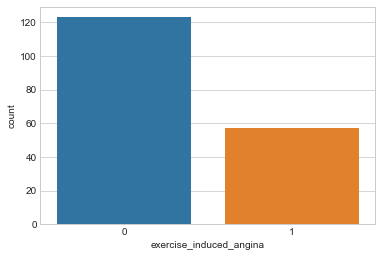

In [57]:
#plotting for better understanding
sns.countplot(train.exercise_induced_angina)

In [26]:
df_bin['exercise_induced_angina']=data['exercise_induced_angina']
df_con['exercise_induced_angina']=data['exercise_induced_angina']

In [27]:
df_bin.head()

,thal,exercise_induced_angina
0,normal,0
1,normal,0
2,normal,1
3,reversible_defect,0
4,reversible_defect,0


# Feature chest_pain_type

In [23]:
data.chest_pain_type.value_counts()

4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64

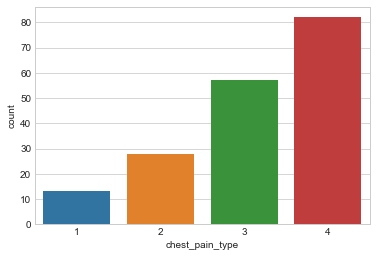

In [56]:
#plotting for better understanding
sns.countplot(train.chest_pain_type)

In [28]:
df_bin['chest_pain_type']=data['chest_pain_type']
df_con['chest_pain_type']=data['chest_pain_type']

In [29]:
df_bin.head()

,thal,exercise_induced_angina,chest_pain_type
0,normal,0,2
1,normal,0,3
2,normal,1,4
3,reversible_defect,0,4
4,reversible_defect,0,1


# feature num_major_vessels

In [30]:
data.num_major_vessels.value_counts()

0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64

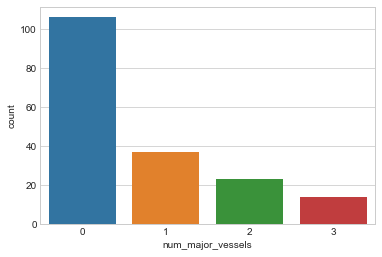

In [55]:
#plotting for better understanding
sns.countplot(train.num_major_vessels)

In [32]:
df_bin['num_major_vessels']=data['num_major_vessels']
df_con['num_major_vessels']=data['num_major_vessels']

In [33]:
df_bin.head()

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels
0,normal,0,2,0
1,normal,0,3,0
2,normal,1,4,3
3,reversible_defect,0,4,0
4,reversible_defect,0,1,0


# feature age

# feature fasting_blood_sugar_gt_120_mg_per_dl

In [38]:
data.fasting_blood_sugar_gt_120_mg_per_dl.value_counts()

0    151
1     29
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: int64

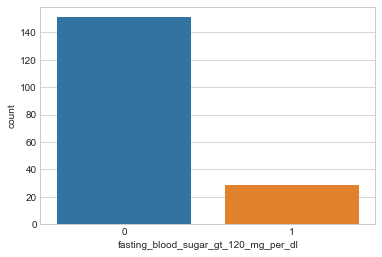

In [54]:
#plotting for better understanding
sns.countplot(train.fasting_blood_sugar_gt_120_mg_per_dl)

In [40]:
df_bin['fasting_blood_sugar_gt_120_mg_per_dl']=data['fasting_blood_sugar_gt_120_mg_per_dl']
df_con['fasting_blood_sugar_gt_120_mg_per_dl']=data['fasting_blood_sugar_gt_120_mg_per_dl']

In [47]:
df_bin.head()

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl
0,normal,0,2,0,0
1,normal,0,3,0,0
2,normal,1,4,3,0
3,reversible_defect,0,4,0,0
4,reversible_defect,0,1,0,0


# feature resting_ekg_results

In [48]:
data.resting_ekg_results.value_counts()

2    94
0    85
1     1
Name: resting_ekg_results, dtype: int64

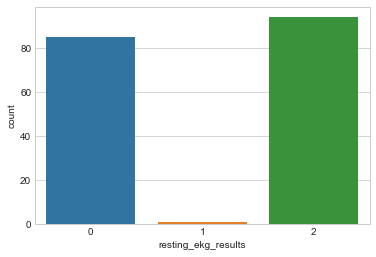

In [53]:
#plotting for better understanding
sns.countplot(train.resting_ekg_results)

In [50]:
df_bin['resting_ekg_results']=data['resting_ekg_results']
df_con['resting_ekg_results']=data['resting_ekg_results']

In [51]:
df_bin.head()

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results
0,normal,0,2,0,0,2
1,normal,0,3,0,0,0
2,normal,1,4,3,0,2
3,reversible_defect,0,4,0,0,0
4,reversible_defect,0,1,0,0,2


# feature heart_disease_present

In [62]:
data.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [63]:
df_bin['heart_disease_present']=data['heart_disease_present']
df_con['heart_disease_present']=data['heart_disease_present']

In [66]:
df_bin.head()

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,heart_disease_present
0,normal,0,2,0,0,2,0
1,normal,0,3,0,0,0,0
2,normal,1,4,3,0,2,1
3,reversible_defect,0,4,0,0,0,1
4,reversible_defect,0,1,0,0,2,0


# feature sex

In [52]:
data.sex.value_counts()

1    124
0     56
Name: sex, dtype: int64

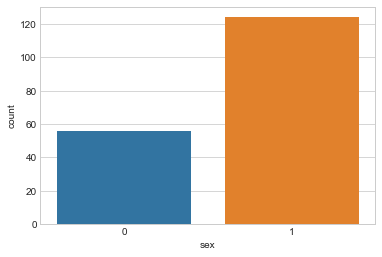

In [60]:
#plotting for better understanding
sns.countplot(train.sex)

In [67]:
df_bin['sex']=data['sex']
df_con['sex']=data['sex']

In [68]:
df_bin.head()

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,heart_disease_present,sex
0,normal,0,2,0,0,2,0,1
1,normal,0,3,0,0,0,0,0
2,normal,1,4,3,0,2,1,1
3,reversible_defect,0,4,0,0,0,1,1
4,reversible_defect,0,1,0,0,2,0,1


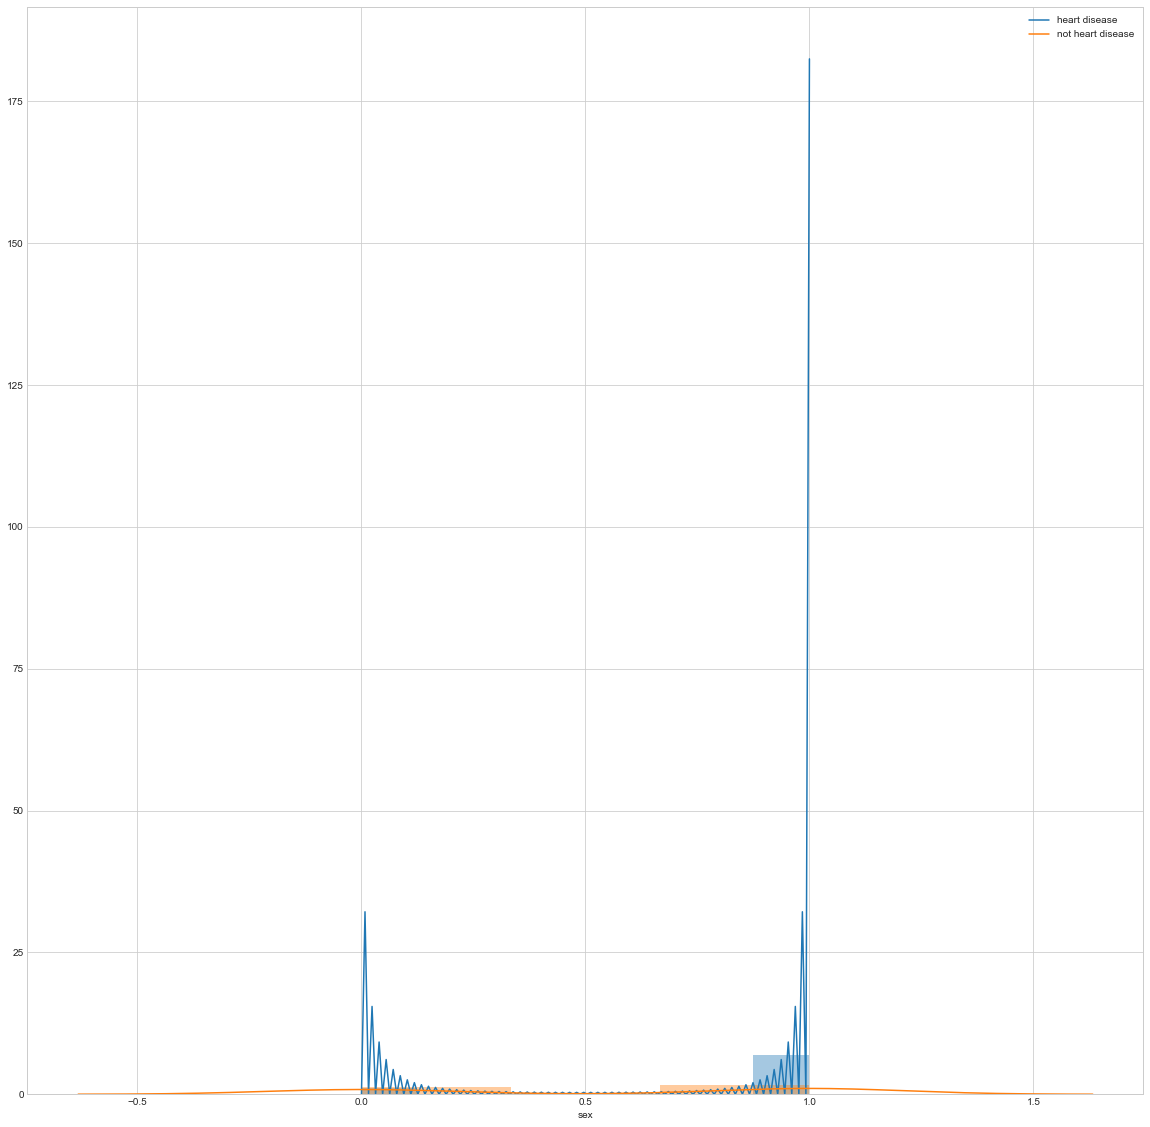

In [75]:
# How does the Sex variable look compared to heart_-present?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(20, 20))
sns.distplot(df_bin.loc[df_bin['heart_disease_present'] == 1]['sex'], kde_kws={'label': 'heart disease'});
sns.distplot(df_bin.loc[df_bin['heart_disease_present'] == 0]['sex'], kde_kws={'label': 'not heart disease'});









# data distribution

In [76]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


# AGE

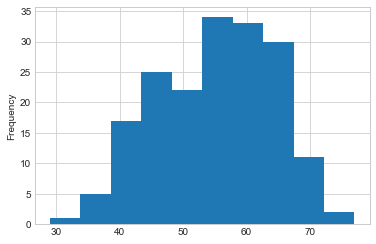

In [77]:
train.age.plot.hist()

In [78]:
#add age to dataframe
df_con['age'] = train['age']
df_bin['age'] = pd.cut(train['age'],bins=5)

In [79]:
df_bin.age.value_counts()

(57.8, 67.4]      63
(48.2, 57.8]      56
(38.6, 48.2]      42
(67.4, 77.0]      13
(28.952, 38.6]     6
Name: age, dtype: int64

# feature resting_blood_pressure